In [1]:
import os
import imageio.v2 as imageio

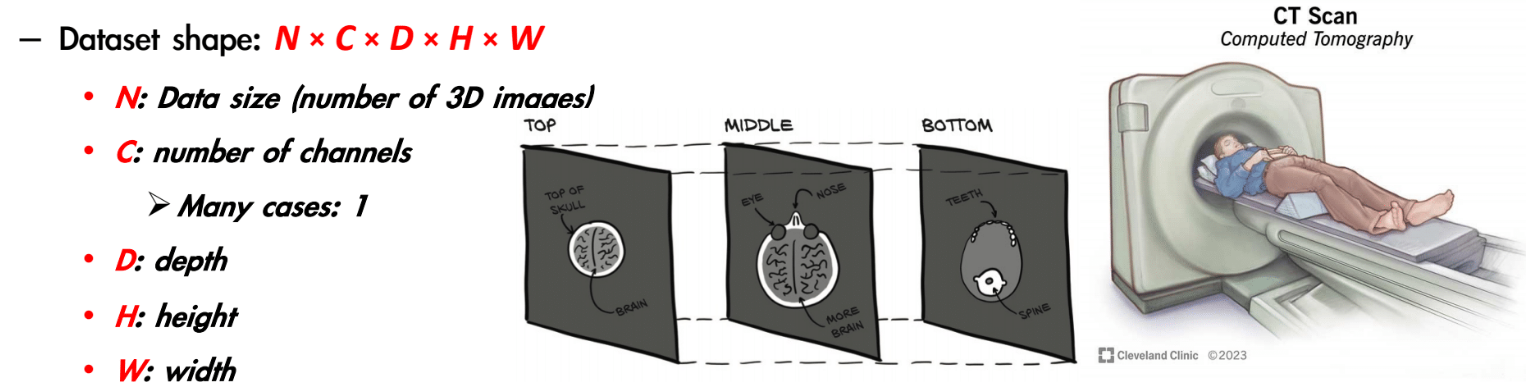

### By stacking individual "one-channel 2D slices" into a 4D tensor having extra depth(D) dim after the channel(C) dim

In [15]:
dir_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "c_volumetric-dicom", "2-LUNG_3.0_B70f-04083")

print(os.path.abspath(os.path.curdir))
print(os.path.abspath(os.path.pardir))
print(os.path.abspath(os.path.join(os.path.pardir, os.path.pardir)))

c:\git_deeplearning\DeepLearning\_03_your_code\_03_real_world_data_to_tensors
c:\git_deeplearning\DeepLearning\_03_your_code
c:\git_deeplearning\DeepLearning


In [19]:
dir_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "c_volumetric-dicom", "2-LUNG_3.0_B70f-04083")
vol_array = imageio.volread(dir_path, format='DICOM')
print()
print(type(vol_array))   # >>> <class 'imageio.core.util.Array'>:  Numpy NDArray
print()
print(vol_array.shape)   # >>> (99, 512, 512)
print()
print(vol_array.dtype)   # >>> int16
print()
print(vol_array[0])

Reading DICOM (examining files): 1/99 files (1.0%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 99/99  (100.0%)

<class 'imageio.core.util.Array'>

(99, 512, 512)

int16

[[ -985  -990  -999 ... -1017 -1008  -971]
 [-1016  -984  -963 ... -1000 -1009  -999]
 [-1024 -1008  -996 ...  -979 -1021  -987]
 ...
 [ -920  -942  -944 ...  -893  -917  -955]
 [ -871  -879  -905 ...  -895  -869  -867]
 [ -876  -855  -873 ...  -933  -982  -936]]


## Visualize the 3D images & Changing it into tensor and Adjust the dim layout

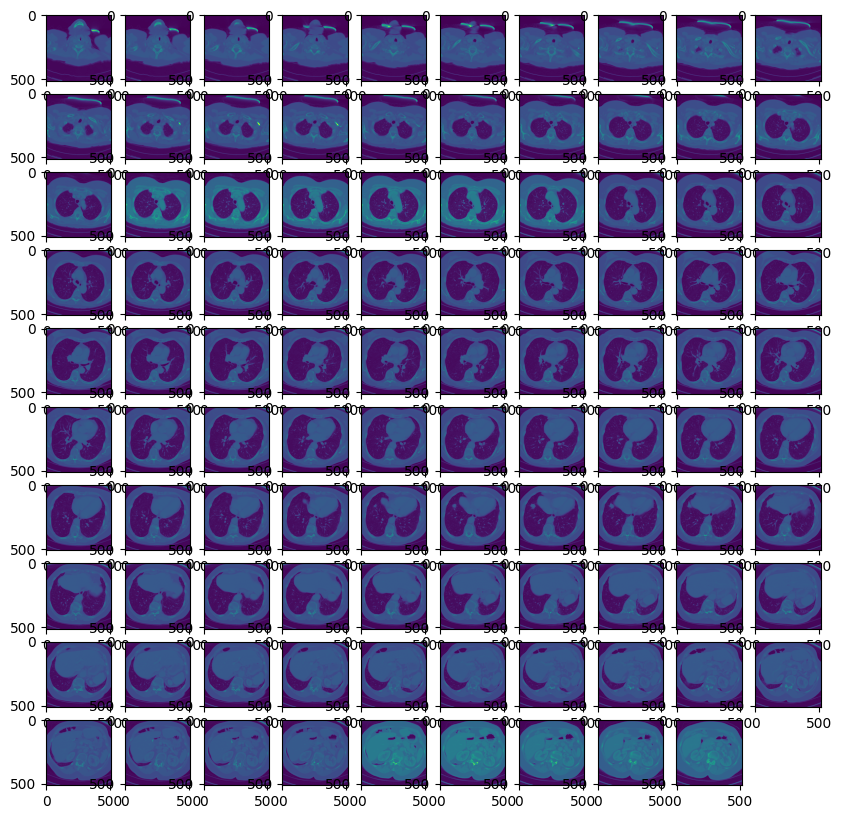

torch.Size([1, 1, 99, 512, 512])


In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
for id in range(0, 99):
  fig.add_subplot(10, 10, id + 1)
  plt.imshow(vol_array[id])
plt.show()

import torch

vol = torch.from_numpy(vol_array).float()
vol = torch.unsqueeze(vol, 0)  # channel
vol = torch.unsqueeze(vol, 0)  # data size

print(vol.shape)  # >>> torch.Size([1, 1, 99, 512, 512])

## Normalizing the Data

In [24]:
mean = torch.mean(vol, dim=(3, 4), keepdim=True)  # mean over all of dim=(3, 4)
print(mean.shape)
std = torch.std(vol, dim=(3, 4), keepdim=True)    # std over all of dim=(3, 4)
print(std.shape)
vol = (vol - mean) / std
print(vol.shape)

print(vol[0, 0, 0])

torch.Size([1, 1, 99, 1, 1])
torch.Size([1, 1, 99, 1, 1])
torch.Size([1, 1, 99, 512, 512])
tensor([[-1.0002, -1.0102, -1.0283,  ..., -1.0645, -1.0464, -0.9720],
        [-1.0625, -0.9982, -0.9560,  ..., -1.0303, -1.0484, -1.0283],
        [-1.0785, -1.0464, -1.0223,  ..., -0.9881, -1.0725, -1.0042],
        ...,
        [-0.8696, -0.9138, -0.9178,  ..., -0.8153, -0.8636, -0.9399],
        [-0.7711, -0.7872, -0.8394,  ..., -0.8194, -0.7671, -0.7631],
        [-0.7812, -0.7390, -0.7752,  ..., -0.8957, -0.9941, -0.9017]])
